In [ ]:
import sys
sys.path.append("../")
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Transformation : normalisation entre 0 et 1 et conversion en Tensor
transform = transforms.Compose([
    transforms.Resize((14, 14)),   # ou (21, 21)
    transforms.ToTensor()
])

# Télécharger le dataset MNIST
train_dataset = datasets.MNIST(root="./data", train=True, download=False, transform=transform)
test_dataset = datasets.MNIST(root="./data", train=False, download=False, transform=transform)




In [2]:

X_train=train_dataset.data.unsqueeze(1)
y_train=train_dataset.targets
x_test=train_dataset.data.unsqueeze(1)
y_test=train_dataset.targets


In [3]:
formes = []
formes.extend([X_train[0], X_train[1], X_train[2], X_train[3], X_train[4],X_train[5],X_train[7],X_train[11],X_train[15],X_train[17]])


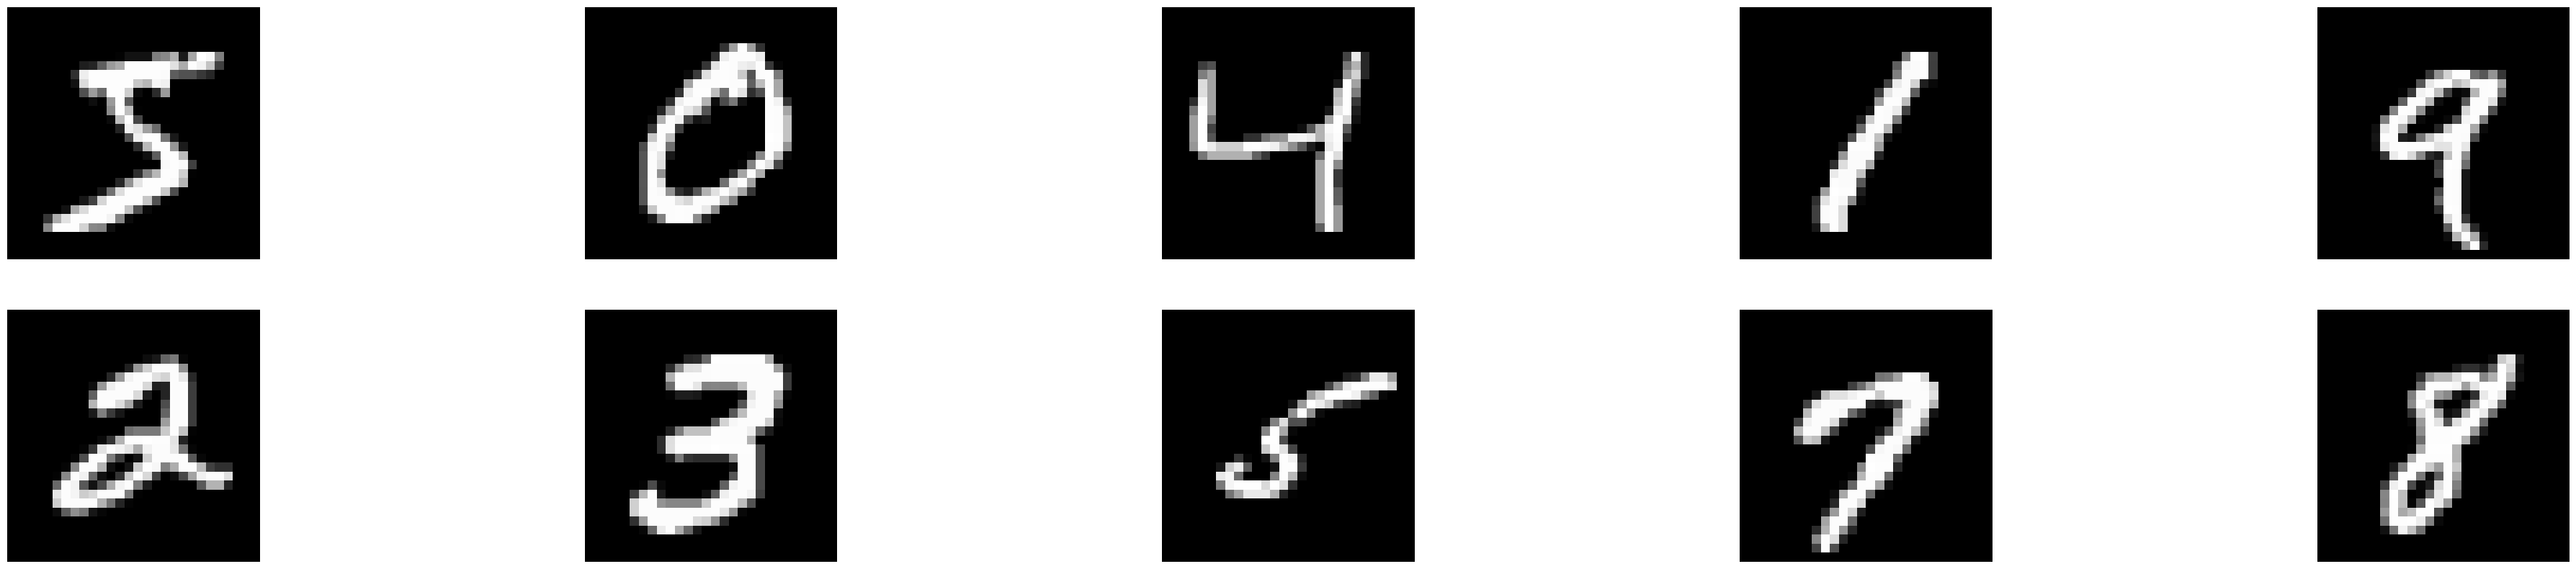

In [5]:
import torch
import matplotlib.pyplot as plt

fig,axes=plt.subplots(2,5,figsize=(50,10))
axes=axes.flatten()
for i,f in enumerate(formes):
 img = f.squeeze(0).numpy() # (5, 5)
 axes[i].imshow(img, cmap='gray')
 axes[i].axis('off')


In [6]:
y_test=torch.eye(10)[y_test.long()]
y_train=torch.eye(10)[y_train.long()]


In [ ]:
from core.MLp_layer import *
from CNN.Loop_based_cnn.Cnn_layers import *
from CNN.Loop_based_cnn.Cnn_operations import *
from utils.activations import *
from core.model_structure import Deep_learning_Model

In [8]:
X_train_small = X_train[:50]
y_train_small = y_train[:50]
x_test_small = x_test[:10]
y_test_small = y_test[:10]


In [9]:
test_model =Deep_learning_Model(
    "adam", "Crossentropy"
)

test_model.add_layers([
    # Conv 1 : 1 canal en entrée (MNIST est en niveau de gris)
    Conv_layer(1, 16, (3, 3), padding=1, stride=1, initializer="HeNormal"),
    Batch_norm_layer(16),
    LeakyRelu(0.01), 

    # Conv 2
    Conv_layer(16, 32, (3, 3), padding=1, stride=1, initializer="HeNormal"),
    Batch_norm_layer(32),
    LeakyRelu(0.01),

    # MaxPooling
    max_pool_layer((2, 2), stride=2),  # 28x28 → 14x14

    # Conv 3
    Conv_layer(32, 64, (3, 3), padding=1, stride=1, initializer="HeNormal"),
    Batch_norm_layer(64),
    LeakyRelu(0.01),

    # MaxPooling 2
    max_pool_layer((2, 2), stride=2),  # 14x14 → 7x7

    # Flatten
    Flatten_layer(),  # 64 * 7 * 7 = 3136

    # Fully Connected 1
    Layer(64 * 7 * 7, 128, initializer="HeNormal"),
    LeakyRelu(0.01),

    # Fully Connected 2
    Layer(128, 10, initializer="HeNormal"),
])

# Entraînement
train_losses, val_losses, accs, val_accs = test_model.minibatch_SGD_train(
    8, X_train_small, y_train_small, x_test_small, y_test_small, batch_size=5, learning_rate=0.001, accuracy=True
)


1 | Train Loss: 0.3458 | Val Loss: 0.3371 | Train Acc: 10.00% | Val Acc: 10.00%
2 | Train Loss: 0.3201 | Val Loss: 0.2604 | Train Acc: 22.00% | Val Acc: 50.00%
3 | Train Loss: 0.2597 | Val Loss: 0.1993 | Train Acc: 36.00% | Val Acc: 50.00%
4 | Train Loss: 0.1836 | Val Loss: 0.1645 | Train Acc: 60.00% | Val Acc: 50.00%
5 | Train Loss: 0.1420 | Val Loss: 0.1093 | Train Acc: 62.00% | Val Acc: 70.00%
6 | Train Loss: 0.0899 | Val Loss: 0.0386 | Train Acc: 74.00% | Val Acc: 100.00%
7 | Train Loss: 0.0398 | Val Loss: 0.0216 | Train Acc: 94.00% | Val Acc: 100.00%
8 | Train Loss: 0.0342 | Val Loss: 0.0187 | Train Acc: 88.00% | Val Acc: 100.00%


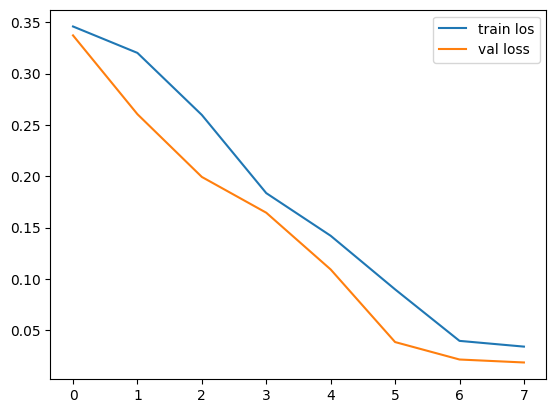

In [10]:
import matplotlib.pyplot as plt
plt.plot(range(8),train_losses,label="train los")
plt.plot(range(8),val_losses,label="val loss")
plt.legend()

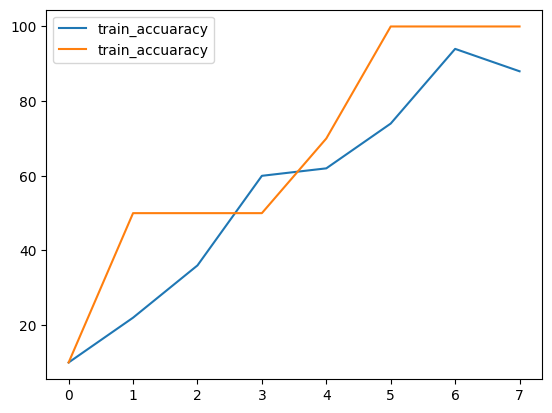

In [11]:
plt.plot(range(8),accs,label="train_accuaracy")
plt.plot(range(8),val_accs,label="train_accuaracy")
plt.legend()